# Understanding Normalized stepper

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import exponax as ex

## Linear Steppers

### Advection

The dynamics of the advection equation in 1d

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

on a periodic domain $\Omega = (0, L)$ solved with the exponential time
differencing scheme is uniquely defined by:

1. The `domain_extent` $L$ defining how large the domain is.
2. The `num_points` $N$ defining how many degrees of freedom discretize the domain.
3. The `dt` $\Delta t$ time step describing how far two consecutive states are apart.
4. The `velocity` $c$ advection speed describing how fast the states are moving.

This is reflected in the instantiation of of the `Advection` class.

In [3]:
advection_stepper = ex.stepper.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    velocity=0.25,
)

2024-03-05 10:20:10.372160: W external/xla/xla/service/gpu/nvptx_compiler.cc:679] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.52). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Let us discretize the first sine mode on the corresponding grid

In [4]:
grid = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper.domain_extent,
    num_points=advection_stepper.num_points,
)
u_0 = jnp.sin(2 * jnp.pi / advection_stepper.domain_extent * grid)

Let's plot the initial condition next to its first step into the future.
Purposefully, let's not plot the grid on the x-axis.

(Recall that we have to index `[0]` to remove the singleton dimension.)

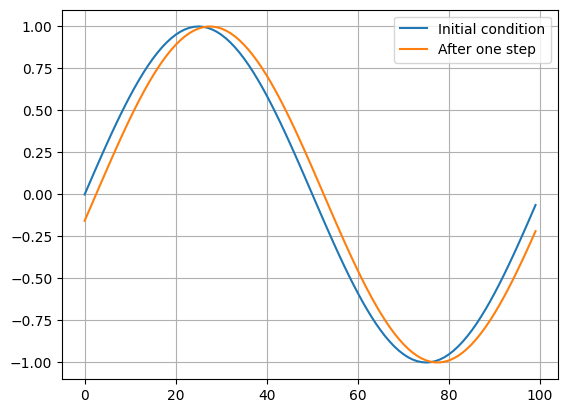

In [5]:
plt.plot(u_0[0], label="Initial condition")
plt.plot(advection_stepper(u_0)[0], label="After one step")
plt.legend()
plt.grid()

Now, let's define three more advection steppers with a slightly different
configuration which adapt the `domain_extent`, `dt`, and `velocity` parameters,
but keep the `num_points` the same.

In comparison to the original `advection_stepper`, these are different by:

2. `advection_stepper_2` has a five times larger `velocity` and a five times smaller `dt`.
3. `advection_stepper_3` has only half the `domain_extent`, but also half the `velocity`.
4. `advection_stepper_4` also only has half the `domain_extent`, but half the `dt`.

In [6]:
advection_stepper_2 = ex.stepper.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.1,
    velocity=1.25,
)
advection_stepper_3 = ex.stepper.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.5,
    velocity=0.125,
)
advection_stepper_4 = ex.stepper.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.25,
    velocity=0.25,
)

Let's define the first sine mode initial condition on all the respective grids

In [7]:
grid_2 = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper_2.domain_extent,
    num_points=advection_stepper_2.num_points,
)
u_0_2 = jnp.sin(2 * jnp.pi / advection_stepper_2.domain_extent * grid_2)

grid_3 = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper_3.domain_extent,
    num_points=advection_stepper_3.num_points,
)
u_0_3 = jnp.sin(2 * jnp.pi / advection_stepper_3.domain_extent * grid_3)

grid_4 = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper_4.domain_extent,
    num_points=advection_stepper_4.num_points,
)
u_0_4 = jnp.sin(2 * jnp.pi / advection_stepper_4.domain_extent * grid_4)

Finally, let's plot the initial condition and the first step into the future for all four advection steppers.

Text(0.5, 1.0, 'Advection 4')

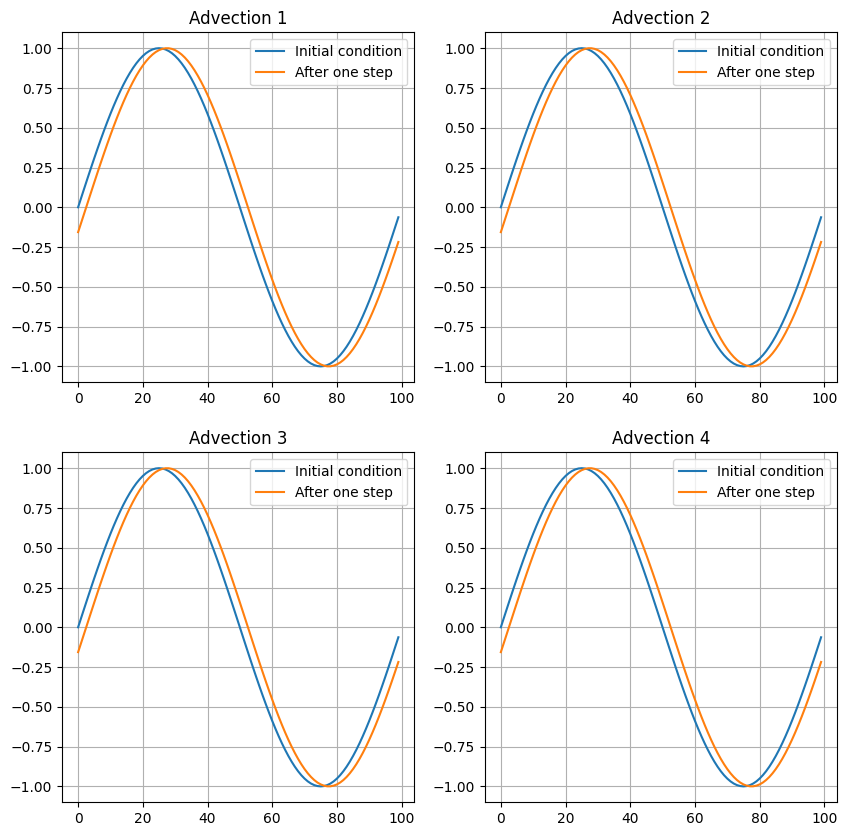

In [8]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 10))

ax_s[0, 0].plot(u_0[0], label="Initial condition")
ax_s[0, 0].plot(advection_stepper(u_0)[0], label="After one step")
ax_s[0, 0].legend()
ax_s[0, 0].grid()
ax_s[0, 0].set_title("Advection 1")

ax_s[0, 1].plot(u_0_2[0], label="Initial condition")
ax_s[0, 1].plot(advection_stepper_2(u_0_2)[0], label="After one step")
ax_s[0, 1].legend()
ax_s[0, 1].grid()
ax_s[0, 1].set_title("Advection 2")

ax_s[1, 0].plot(u_0_3[0], label="Initial condition")
ax_s[1, 0].plot(advection_stepper_3(u_0_3)[0], label="After one step")
ax_s[1, 0].legend()
ax_s[1, 0].grid()
ax_s[1, 0].set_title("Advection 3")

ax_s[1, 1].plot(u_0_4[0], label="Initial condition")
ax_s[1, 1].plot(advection_stepper_4(u_0_4)[0], label="After one step")
ax_s[1, 1].legend()
ax_s[1, 1].grid()
ax_s[1, 1].set_title("Advection 4")

Do you notice that all four plots look the same?

This is because the dynamics of the advection equation is uniquely defined by
the coefficient (dimensionless quantity)

$$ \alpha_1 = \frac{c \Delta t}{L} = \frac{[\frac{m}{s}][s]}{[m]} = [1]$$

### Diffusion Equation

For the diffusion equation in 1d

$$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} $$

something similar.

Again, let us start with one fixed example

In [9]:
diffusion_stepper = ex.stepper.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    diffusivity=0.2,
)

In [10]:
grid = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper.domain_extent,
    num_points=diffusion_stepper.num_points,
)
u_0 = jnp.sin(2 * jnp.pi / diffusion_stepper.domain_extent * grid)

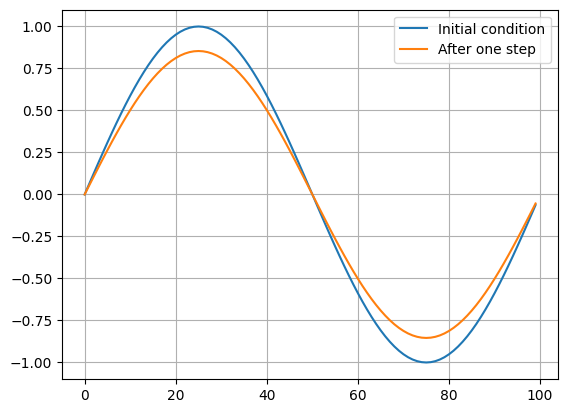

In [11]:
plt.plot(u_0[0], label="Initial condition")
plt.plot(diffusion_stepper(u_0)[0], label="After one step")
plt.legend()
plt.grid()

Now, we again introduce three more diffusion steppers with a slightly different
configuration which adapt the `domain_extent`, `dt`, and `nu` parameters, but
keep the `num_points` the same.

In comparison to the original `diffusion_stepper`, these are different by:

2. `diffusion_stepper_2` has a five times larger `nu` and a five times smaller `dt`.
3. `diffusion_stepper_3` has only half the `domain_extent`, but also **quarter** the `nu`.
4. `diffusion_stepper_4` also only has half the `domain_extent`, but **quarter** the `dt`.

In [12]:
diffusion_stepper_2 = ex.stepper.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.1,
    diffusivity=1.0,
)
diffusion_stepper_3 = ex.stepper.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.5,
    diffusivity=0.05,
)
diffusion_stepper_4 = ex.stepper.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.125,
    diffusivity=0.2,
)

Again, we discretize the first sine mode on all the respective grids

In [13]:
grid_2 = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper_2.domain_extent,
    num_points=diffusion_stepper_2.num_points,
)
u_0_2 = jnp.sin(2 * jnp.pi / diffusion_stepper_2.domain_extent * grid_2)

grid_3 = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper_3.domain_extent,
    num_points=diffusion_stepper_3.num_points,
)
u_0_3 = jnp.sin(2 * jnp.pi / diffusion_stepper_3.domain_extent * grid_3)

grid_4 = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper_4.domain_extent,
    num_points=diffusion_stepper_4.num_points,
)
u_0_4 = jnp.sin(2 * jnp.pi / diffusion_stepper_4.domain_extent * grid_4)

And similarly plot the initial condition next to its first step into the future for all four diffusion steppers.

Text(0.5, 1.0, 'Diffusion 4')

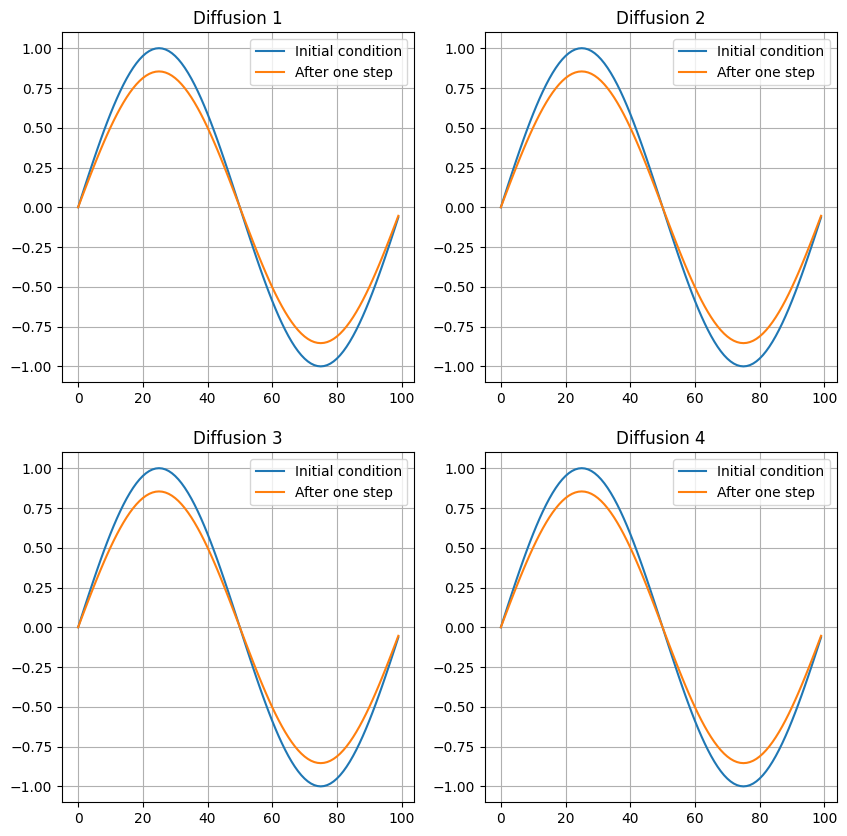

In [14]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 10))

ax_s[0, 0].plot(u_0[0], label="Initial condition")
ax_s[0, 0].plot(diffusion_stepper(u_0)[0], label="After one step")
ax_s[0, 0].legend()
ax_s[0, 0].grid()
ax_s[0, 0].set_title("Diffusion 1")

ax_s[0, 1].plot(u_0_2[0], label="Initial condition")
ax_s[0, 1].plot(diffusion_stepper_2(u_0_2)[0], label="After one step")
ax_s[0, 1].legend()
ax_s[0, 1].grid()
ax_s[0, 1].set_title("Diffusion 2")

ax_s[1, 0].plot(u_0_3[0], label="Initial condition")
ax_s[1, 0].plot(diffusion_stepper_3(u_0_3)[0], label="After one step")
ax_s[1, 0].legend()
ax_s[1, 0].grid()
ax_s[1, 0].set_title("Diffusion 3")

ax_s[1, 1].plot(u_0_4[0], label="Initial condition")
ax_s[1, 1].plot(diffusion_stepper_4(u_0_4)[0], label="After one step")
ax_s[1, 1].legend()
ax_s[1, 1].grid()
ax_s[1, 1].set_title("Diffusion 4")

For the diffusion equation, the coefficient (dimensionless quantity) is defined
by

$$ \alpha_2 = \frac{\nu \Delta t}{L^2} = \frac{[\frac{m^2}{s}][s]}{[m]^2} = [1]$$

### Advection-Diffusion

The advection-diffusion equation in 1d is given by

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2} $$

Here, we have two constitutive parameters, namely the `velocity` (advection
speed) $c$ and the `diffusivity` (viscosity) $\nu$.

Again, let us start with one fixed example

In [15]:
advection_diffusion_stepper = ex.stepper.AdvectionDiffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    velocity=0.25,
    diffusivity=0.2,
)

Again with the first sine mode on the respective domain

In [16]:
grid = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_diffusion_stepper.domain_extent,
    num_points=advection_diffusion_stepper.num_points,
)
u_0 = jnp.sin(2 * jnp.pi / advection_diffusion_stepper.domain_extent * grid)

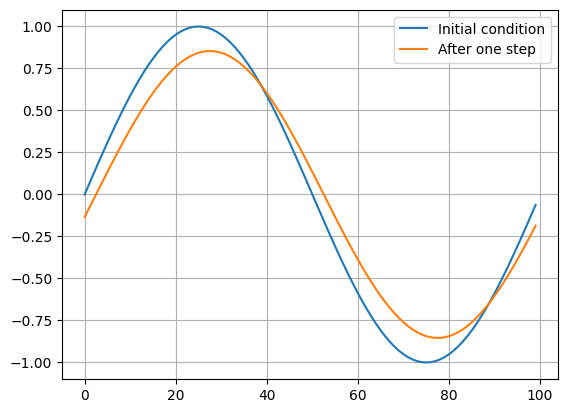

In [17]:
plt.plot(u_0[0], label="Initial condition")
plt.plot(advection_diffusion_stepper(u_0)[0], label="After one step")
plt.legend()
plt.grid()

The advection-diffusion equation is uniquely defined by the two coefficients
(dimensionless quantities)

$$ \alpha_1 = \frac{c \Delta t}{L}$$

$$ \alpha_2 = \frac{\nu \Delta t}{L^2}$$

### General Linear Stepper

A general linear equation can be written as 

$$ \frac{\partial u}{\partial t} = \sum_{j=0}^s  a_j \frac{\partial^j u}{\partial x^j} $$

where $a_j$ are the coefficients of the linear equation.

Relating this to the advection-diffusion equation, we have $c = - a_1$ and $\nu
= a_2$. In more general terms, $a_0$ defines a drag, $a_3$ is the dispersity,
and $a_4$ is related to hyper diffusivity.

Let's instantiate the same advection-diffusion stepper, but with the
`ex.GeneralLinearStepper`. Similar to more concrete steppers of before it also
requires setting `num_spatial_dims`, `domain_extent`, `num_points`, and `dt`.
However, now the prescription of constitutive parameters is via a list of
values. The length of this list defines the highest occuring derivative, i.e. `s
= len(coefficients)`. If you only want to instantiate a stepper with a dynamic
contribution from the third order term (for a dispersion equation), set
`coefficients = [0, 0, 0, dispersivity]` (prepend as many zeros as necessary).

In [18]:
advection_diffusion_general = ex.stepper.GeneralLinearStepper(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    coefficients=[0.0, -0.25, 0.2],
)

Let's define the first sine mode in the respective grid

In [19]:
general_grid = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_diffusion_general.domain_extent,
    num_points=advection_diffusion_general.num_points,
)
general_u_0 = jnp.sin(
    2 * jnp.pi / advection_diffusion_general.domain_extent * general_grid
)

Let's plot initial condition and first step into the future of the general
advection-diffusion stepper and the advection-diffusion stepper of before.

Text(0.5, 1.0, 'Advection Diffusion Stepper')

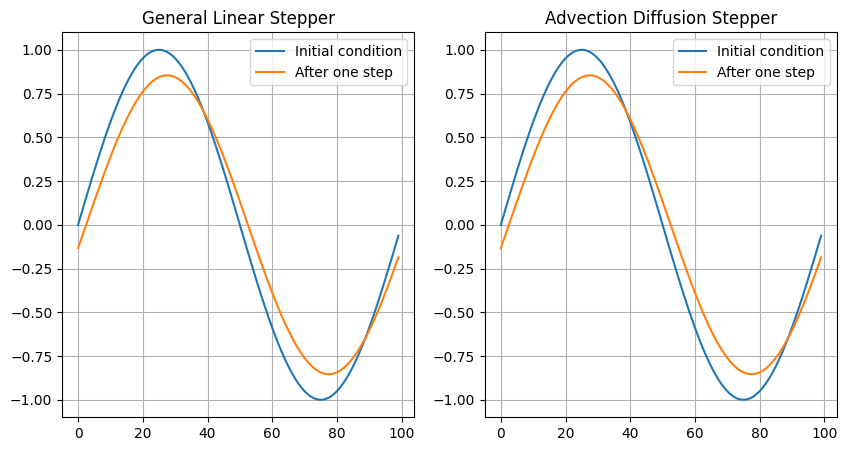

In [20]:
fig, ax_s = plt.subplots(1, 2, figsize=(10, 5))

ax_s[0].plot(general_u_0[0], label="Initial condition")
ax_s[0].plot(advection_diffusion_general(general_u_0)[0], label="After one step")
ax_s[0].legend()
ax_s[0].grid()
ax_s[0].set_title("General Linear Stepper")

ax_s[1].plot(u_0[0], label="Initial condition")
ax_s[1].plot(advection_diffusion_stepper(u_0)[0], label="After one step")
ax_s[1].legend()
ax_s[1].grid()
ax_s[1].set_title("Advection Diffusion Stepper")

As expected, they produce the same dynamic. When using `Exponax`, you are free
to either use the general interface or the specialized interface which is
defined for the first four derivatives. Precisely, `Exponax` has defined:

- `AdvectionStepper`
- `DiffusionStepper`
- `AdvectionDiffusionStepper`
- `DispersionStepper`
- `HyperDiffusionStepper`

**Important Remark**: Be careful how to handle the sign in the
`GeneralLinearStepper`. For example, the entry for the `velocity` has to be
negated to have state moving to the right. Another example is the
`hyper_diffusivity` which also has to be negated to have a dissipative effect.

### Normalized Linear Stepper

In conclusion, we now saw two aspects:

1. Any linear PDE (given a combination of an arbitrary number of derivatives
   with their respective constitutive parameters) can be described by a list of
   parameters together with the standard parameters `num_spatial_dims`,
    `domain_extent`, `num_points`, and `dt`.
2. The dynamics of a linear PDE can be uniquely expressed in a coefficient
   (dimensionless quantity) which depends on the respective constitutive `a[j]`,
   the `domain_extent` $L$, and the `dt` $\Delta t$.

More generally speaking, we can express the normalized coefficient for the
dynamics stemming from the $j$-th derivative as

$$ \alpha_j = \frac{a_j \Delta t}{L^j} $$

Hence, it is natural to introduce a `ex.normalized.NormalizedLinearStepper` that
only takes the `num_spatial_dims`, `num_points`, and a list of
`normalized_coefficients` as input. With it, we essentially the ambiguity of the
`domain_extent` and `dt` parameters. The `NormalizedLinearStepper` is a very
powerful tool to study the dynamics of linear PDEs.

Let's use it to instantiate a stepper that essentially behaves like the
`ex.stepper.GeneralLinearStepper` (representing advection-diffusion) of before.

In [21]:
advection_diffusion_normalized = ex.normalized.NormalizedLinearStepper(
    1,  # number of dimensions (set to 1)
    num_points=100,
    normalized_coefficients=[
        0.0,
        -0.25 * 0.5 / 5.0,
        0.2 * 0.5 / (5.0**2),
    ],
)

Let's investigate the PyTree structure of the normalized stepper.

Since we normalized the coefficients, this stepper uses unit dynamics, hence
`domain_extent=1.0` and `dt=1.0`.

In [22]:
advection_diffusion_normalized

NormalizedLinearStepper(
  num_spatial_dims=1,
  domain_extent=1.0,
  num_points=100,
  num_channels=1,
  dt=1.0,
  dx=0.01,
  _integrator=ETDRK0(dt=1.0, _exp_term=c64[1,51]),
  normalized_coefficients=[0.0, -0.025, 0.004]
)

Let's also create a grid and discretize the first sine mode on it.

In [23]:
normalized_grid = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_diffusion_normalized.domain_extent,
    num_points=100,
)
normalized_u_0 = jnp.sin(
    2 * jnp.pi / advection_diffusion_normalized.domain_extent * normalized_grid
)

Let's plot the initial condition and the first step into the future for both the
normalized stepper and the advection-diffusion general stepper it was based on.

Text(0.5, 1.0, 'General Linear Stepper')

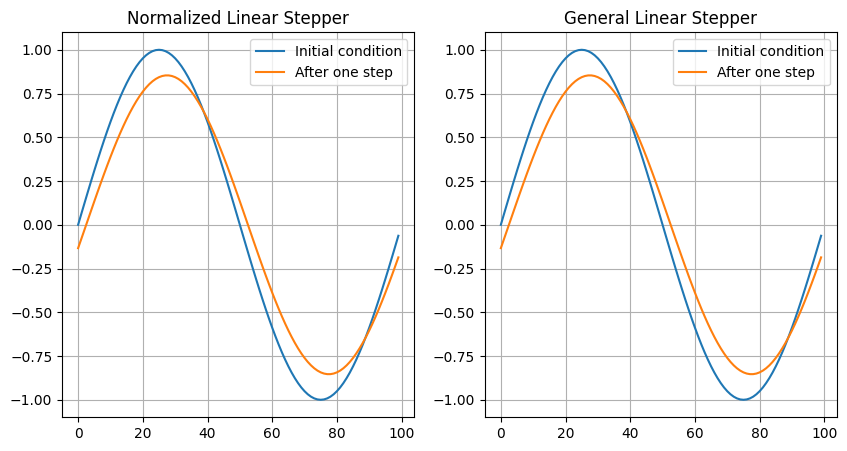

In [24]:
fig, ax_s = plt.subplots(1, 2, figsize=(10, 5))

ax_s[0].plot(normalized_u_0[0], label="Initial condition")
ax_s[0].plot(advection_diffusion_normalized(normalized_u_0)[0], label="After one step")
ax_s[0].legend()
ax_s[0].grid()
ax_s[0].set_title("Normalized Linear Stepper")

ax_s[1].plot(general_u_0[0], label="Initial condition")
ax_s[1].plot(advection_diffusion_general(general_u_0)[0], label="After one step")
ax_s[1].legend()
ax_s[1].grid()
ax_s[1].set_title("General Linear Stepper")

## Nonlinear Steppers

### Burgers equation

The Burgers equation in 1d (using the conservative form) reads

$$ \frac{\partial u}{\partial t} + b \frac{1}{2} \frac{\partial}{\partial x} \left( u^2 \right) = \nu \frac{\partial^2 u}{\partial x^2} $$

Its dynamics is uniquely described by the following arguments:

1. The `domain_extent` $L$ defining how large the domain is.
2. The `num_points` $N$ defining how many degrees of freedom discretize the domain.
3. The `dt` $\Delta t$ time step describing how far two consecutive states are apart.
4. The `viscosity` $\nu$ describing how much the states are diffusing.
5. The `b` describing how much the states are advecting. (Typically, $b=1$.)

Let's set up a sample stepper for the Burgers equation.

In [25]:
burgers_stepper = ex.stepper.Burgers(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.7,
    diffusivity=0.05,
    convection_scale=0.25,  # Let's be brave and set it different from its default 1.0
)

In contrast to the linear steppers, let us use a bit more sophisticated initial condition

In [26]:
grid = ex.make_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=burgers_stepper.domain_extent,
    num_points=burgers_stepper.num_points,
)
u_0 = (
    +0.4  # Zero (=mean) mode
    + 1.0
    * jnp.sin(2 * jnp.pi / burgers_stepper.domain_extent * grid)  # First sine mode
    + 0.3
    * jnp.cos(6 * jnp.pi / burgers_stepper.domain_extent * grid)  # Third cosine mode
)

Let's also not only plot one step into the future but 4 to have a total of 5 steps

In [27]:
trj = ex.rollout(burgers_stepper, 4, include_init=True)(u_0)

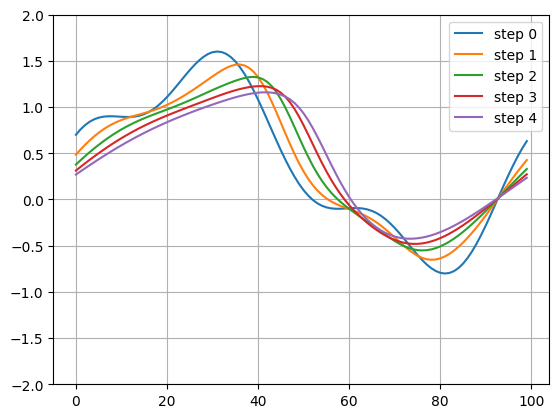

In [28]:
plt.plot(trj[:, 0, :].T, label=[f"step {i}" for i in range(5)])
plt.legend()
plt.grid()
plt.ylim(-2, 2);

Let's make a first round of modifications similar to the linear diffusion stepper:

1. `burgers_stepper_2` has a five times larger `viscosity` and a five times smaller `dt`.
2. `burgers_stepper_3` has only half the `domain_extent`, but also **quarter** the `viscosity`.
3. `burgers_stepper_4` also only has half the `domain_extent`, but **quarter** the `dt`.

In [29]:
burgers_stepper_2 = ex.stepper.Burgers(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.7 / 5,
    diffusivity=0.05 * 5,
    convection_scale=0.25,
)
burgers_stepper_3 = ex.stepper.Burgers(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0 / 2,
    num_points=100,
    dt=0.7,
    diffusivity=0.05 / 4,
    convection_scale=0.25,
)
burgers_stepper_4 = ex.stepper.Burgers(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0 / 2,
    num_points=100,
    dt=0.7 / 4,
    diffusivity=0.05,
    convection_scale=0.25,
)

No need to define the IC again

In [30]:
trj_2 = ex.rollout(burgers_stepper_2, 4, include_init=True)(u_0)
trj_3 = ex.rollout(burgers_stepper_3, 4, include_init=True)(u_0)
trj_4 = ex.rollout(burgers_stepper_4, 4, include_init=True)(u_0)

Text(0.5, 1.0, 'Burgers 4')

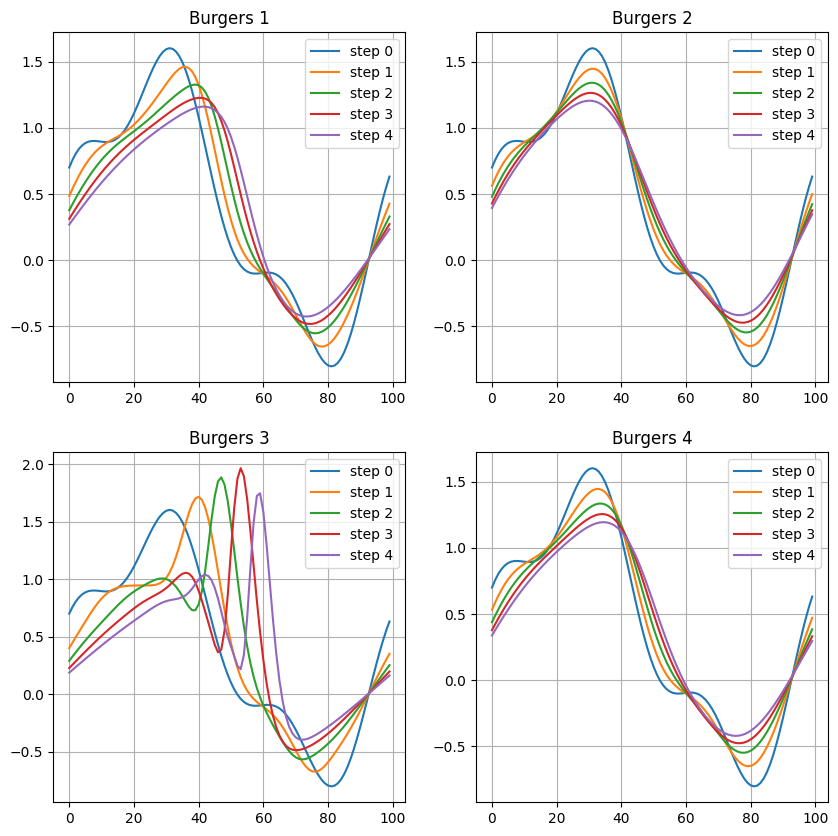

In [31]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 10))

ax_s[0, 0].plot(trj[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[0, 0].legend()
ax_s[0, 0].grid()
ax_s[0, 0].set_title("Burgers 1")

ax_s[0, 1].plot(trj_2[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[0, 1].legend()
ax_s[0, 1].grid()
ax_s[0, 1].set_title("Burgers 2")

ax_s[1, 0].plot(trj_3[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[1, 0].legend()
ax_s[1, 0].grid()
ax_s[1, 0].set_title("Burgers 3")

ax_s[1, 1].plot(trj_4[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[1, 1].legend()
ax_s[1, 1].grid()
ax_s[1, 1].set_title("Burgers 4")

Hmmm ..., the three steppers produce different trajectories. Stepper number 3
even produces spurious oscillations (a sign of instability). Does the scaling no
longer hold?

It turns out that, we also have to modify the $b$ argument (the
`convection_scale`), whenever we modify the `domain_extent` or `dt`!

The correct normalization is given by

$$ \beta = \frac{b \Delta t}{L} $$

i.e. it is normalized similar to the advection coefficient $\alpha_1$. This also
makes sense since it also only has a first-order derivative!

So, let's create a new set of Burgers steppers with the following modifications:

5. `burgers_stepper_5` has a five times larger `viscosity` and a five times smaller `dt`; **and a five times larger `convection_scale`**.
6. `burgers_stepper_6` has only half the `domain_extent`, but also **quarter** the `viscosity`; **and half the `convection_scale`**.
7. `burgers_stepper_7` also only has half the `domain_extent`, but **quarter** the `dt`; **and __ double __ the `convection_scale`**.

In [32]:
burgers_stepper_5 = ex.stepper.Burgers(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.7 / 5,
    diffusivity=0.05 * 5,
    convection_scale=0.25 * 5,  # NEW!
)
burgers_stepper_6 = ex.stepper.Burgers(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0 / 2,
    num_points=100,
    dt=0.7,
    diffusivity=0.05 / 4,
    convection_scale=0.25 / 2,  # NEW!
)
burgers_stepper_7 = ex.stepper.Burgers(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0 / 2,
    num_points=100,
    dt=0.7 / 4,
    diffusivity=0.05,
    convection_scale=0.25 * 2,  # NEW!
)

In [33]:
trj_5 = ex.rollout(burgers_stepper_5, 4, include_init=True)(u_0)
trj_6 = ex.rollout(burgers_stepper_6, 4, include_init=True)(u_0)
trj_7 = ex.rollout(burgers_stepper_7, 4, include_init=True)(u_0)

Text(0.5, 1.0, 'Burgers 7')

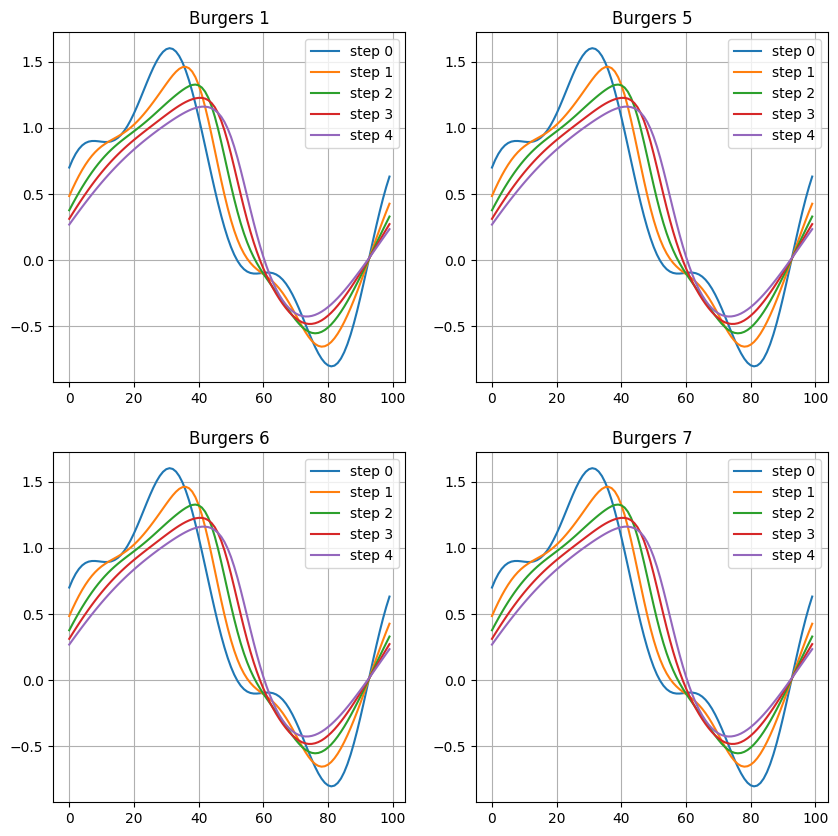

In [34]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 10))

ax_s[0, 0].plot(trj[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[0, 0].legend()
ax_s[0, 0].grid()
ax_s[0, 0].set_title("Burgers 1")

ax_s[0, 1].plot(trj_5[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[0, 1].legend()
ax_s[0, 1].grid()
ax_s[0, 1].set_title("Burgers 5")

ax_s[1, 0].plot(trj_6[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[1, 0].legend()
ax_s[1, 0].grid()
ax_s[1, 0].set_title("Burgers 6")

ax_s[1, 1].plot(trj_7[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[1, 1].legend()
ax_s[1, 1].grid()
ax_s[1, 1].set_title("Burgers 7")

### General Convection Stepper

A general convection stepper extends the idea of a general linear stepper with a
convection nonlinearity. Let's write it as

$$ \frac{\partial u}{\partial t} + b_1 \frac{1}{2} \frac{\partial}{\partial x} \left( u^2 \right)  = \sum_{j=0}^s  a_j \frac{\partial^j u}{\partial x^j}  $$

where $a_j$ are the coefficients of the linear equation and $b_1$ is the
coefficient of the convection term.

Let's use it to define the same Burgers stepper as from before

In [35]:
burgers_general = ex.stepper.GeneralConvectionStepper(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.7,
    coefficients=[0.0, 0.0, 0.05],
    convection_scale=0.25,
)

And roll it out on the same IC

In [36]:
general_trj = ex.rollout(burgers_general, 4, include_init=True)(u_0)

Text(0.5, 1.0, 'General Convection Stepper')

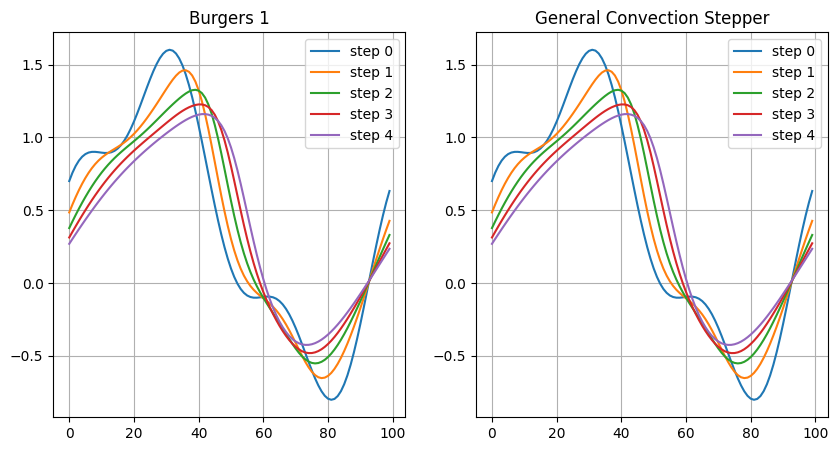

In [37]:
fig, ax_s = plt.subplots(1, 2, figsize=(10, 5))

ax_s[0].plot(trj[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[0].legend()
ax_s[0].grid()
ax_s[0].set_title("Burgers 1")

ax_s[1].plot(general_trj[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[1].legend()
ax_s[1].grid()
ax_s[1].set_title("General Convection Stepper")

### Normalized Convection Stepper

Similar to the normalized linear stepper, we can also introduce a normalized
convection stepper which is the counterpart to the general convection stepper.

It requires us to supply a list of linear normalized coefficients

$$ \alpha_j = \frac{a_j \Delta t}{L^j} $$

and a normalized convection coefficient

$$ \beta_1 = \frac{b_1 \Delta t}{L} $$

Let's do this with the previously set arguments

In [38]:
normalized_burgers = ex.normalized.NormalizedConvectionStepper(
    1,  # number of dimensions (set to 1)
    num_points=100,
    normalized_coefficients=[0.0, 0.0, 0.05 * 0.5 / (5.0**2)],
    normalized_convection_scale=0.25 * 0.5 / 5.0,
)

In [39]:
normalized_trj = ex.rollout(normalized_burgers, 4, include_init=True)(u_0)

Text(0.5, 1.0, 'Normalized Convection Stepper')

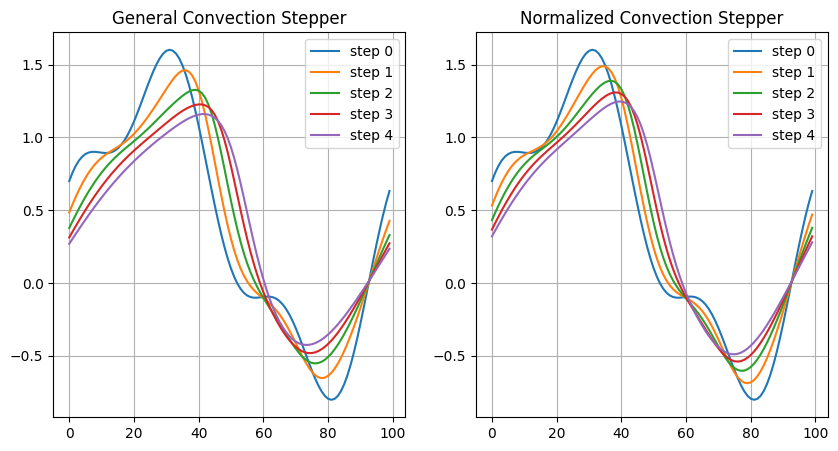

In [40]:
fig, ax_s = plt.subplots(1, 2, figsize=(10, 5))

ax_s[0].plot(general_trj[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[0].legend()
ax_s[0].grid()
ax_s[0].set_title("General Convection Stepper")

ax_s[1].plot(normalized_trj[:, 0, :].T, label=[f"step {i}" for i in range(5)])
ax_s[1].legend()
ax_s[1].grid()
ax_s[1].set_title("Normalized Convection Stepper")

### Kuramoto-Sivashinsky Equation

The Kuramoto-Sivashinsky (KS) equation in 1d (in non-conservative/combustion format) reads

$$ \frac{\partial u}{\partial t} + b \frac{1}{2} \left( \frac{\partial}{\partial x} u \right)^2 + \nu \frac{\partial^2 u}{\partial x^2} + \mu \frac{\partial^4 u}{\partial x^4} = 0 $$

Its dynamics is uniquely described by the following arguments:

1. The `domain_extent` $L$ defining how large the domain is.
2. The `num_points` $N$ defining how many degrees of freedom discretize the domain.
3. The `dt` $\Delta t$ time step describing how far two consecutive states are apart.
4. The `viscosity` $\nu$ describing how much the states are diffusing. Note that we require $\nu>0$ and since the second order term is on the lhs it actually operates destabilizing and introduces energy into the system. (Typically, $\nu=1$.)
5. The `hyper_diffusivity` $\mu$ describing how much the states are hyper-diffusing. This actually dissipates and removes energy from the system. (Typically, $\mu=1$.)
6. The `gradient_norm_scale` $b$ describing how much the states are advecting. (Typically, $b=1$.)

Let's define a default stepper

In [41]:
ks_stepper = ex.stepper.KuramotoSivashinsky(
    1,  # number of dimensions (set to 1)
    domain_extent=60.0,
    num_points=100,
    dt=0.7,
    gradient_norm_scale=0.9,
    second_order_diffusivity=0.95,
    fourth_order_diffusivity=1.05,
)

Let's start from the same initial condition as the Burgers equation

In [42]:
trj = ex.rollout(ks_stepper, 200, include_init=True)(u_0)

Text(0.5, 0, 'Time')

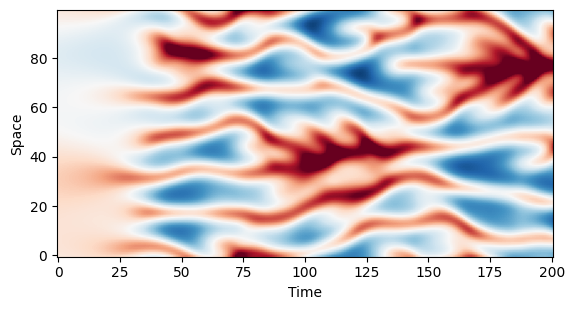

In [43]:
plt.imshow(trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
plt.ylabel("Space")
plt.xlabel("Time")

Let's try the following modifications (with the mods on the nonlineat term being
inspired by what we did for the Burgers equation):

2. `ks_stepper_2` has a five times larger `second_order_diffusivity` and a five times smaller `dt`; **and a five times larger `fourth_order_diffusivity`** and **a five times larger `gradient_norm_scale`**.
3. `ks_stepper_3` has only half the `domain_extent`, but also **quarter** the `second_order_diffusivity`; **and one sixteenth the `fourth_order_diffusivity`** and **half the `gradient_norm_scale`**.
4. `ks_stepper_4` also only has half the `domain_extent`, but **quarter** the
   `dt`; **a fourth the `fourth_order_diffusivity`** and **double the
   `gradient_norm_scale`**.

In [44]:
ks_stepper_2 = ex.stepper.KuramotoSivashinsky(
    1,  # number of dimensions (set to 1)
    domain_extent=60.0,
    num_points=100,
    dt=0.7 / 5,
    gradient_norm_scale=0.9 * 5,
    second_order_diffusivity=0.95 * 5,
    fourth_order_diffusivity=1.05 * 5,
)
ks_stepper_3 = ex.stepper.KuramotoSivashinsky(
    1,  # number of dimensions (set to 1)
    domain_extent=60.0 / 2,
    num_points=100,
    dt=0.7,
    gradient_norm_scale=0.9 / 2,
    second_order_diffusivity=0.95 / 4,
    fourth_order_diffusivity=1.05 / 16,
)
ks_stepper_4 = ex.stepper.KuramotoSivashinsky(
    1,  # number of dimensions (set to 1)
    domain_extent=60.0 / 2,
    num_points=100,
    dt=0.7 / 4,
    gradient_norm_scale=0.9 * 2,
    second_order_diffusivity=0.95,
    fourth_order_diffusivity=1.05 / 4,
)

In [45]:
trj_2 = ex.rollout(ks_stepper_2, 200, include_init=True)(u_0)
trj_3 = ex.rollout(ks_stepper_3, 200, include_init=True)(u_0)
trj_4 = ex.rollout(ks_stepper_4, 200, include_init=True)(u_0)

Text(0.5, 1.0, 'KS 4')

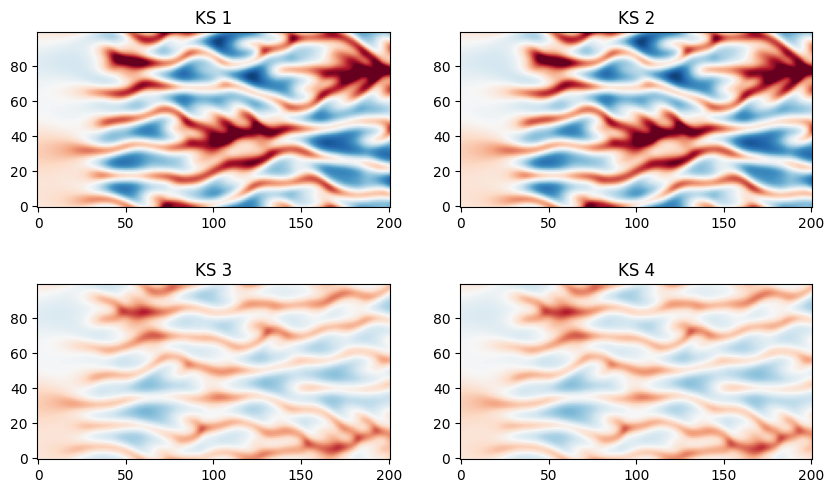

In [46]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 6))

ax_s[0, 0].imshow(trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[0, 0].set_title("KS 1")

ax_s[0, 1].imshow(trj_2[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[0, 1].set_title("KS 2")

ax_s[1, 0].imshow(trj_3[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[1, 0].set_title("KS 3")

ax_s[1, 1].imshow(trj_4[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[1, 1].set_title("KS 4")

Hmmm, surprisingly, only the second stepper produced the same dynamics as the
original one. The third and fourth steppers produce the identical trajectory
albeit different from the original one.

The reason is: **The correct normalization of the gradient norm scale differs
from the normalization of the convection scale**. Let's denote the
`gradient_norm_scale` by $b_2$. Then, its normalized counterpart is given by

$$ \beta_2 = \frac{b_2 \Delta t}{L^2} $$

Based on that, let's use another set of modifications:

5. `ks_stepper_5` has a five times larger `second_order_diffusivity` and a five times smaller `dt`; and a five times larger `fourth_order_diffusivity` and a five times larger `gradient_norm_scale`.
6. `ks_stepper_6` has only half the `domain_extent`, but also quarter the `second_order_diffusivity`; and one sixteenth the `fourth_order_diffusivity` and **quarter** the `gradient_norm_scale`.
7. `ks_stepper_7` also only has half the `domain_extent`, but quarter the `dt`;
   a fourth the `fourth_order_diffusivity` and **unchanged**
   `gradient_norm_scale`.

In [47]:
ks_stepper_5 = ex.stepper.KuramotoSivashinsky(
    1,  # number of dimensions (set to 1)
    domain_extent=60.0,
    num_points=100,
    dt=0.7 / 5,
    gradient_norm_scale=0.9 * 5,
    second_order_diffusivity=0.95 * 5,
    fourth_order_diffusivity=1.05 * 5,
)
ks_stepper_6 = ex.stepper.KuramotoSivashinsky(
    1,  # number of dimensions (set to 1)
    domain_extent=60.0 / 2,
    num_points=100,
    dt=0.7,
    gradient_norm_scale=0.9 / 4,  # NEW!
    second_order_diffusivity=0.95 / 4,
    fourth_order_diffusivity=1.05 / 16,
)
ks_stepper_7 = ex.stepper.KuramotoSivashinsky(
    1,  # number of dimensions (set to 1)
    domain_extent=60.0 / 2,
    num_points=100,
    dt=0.7 / 4,
    gradient_norm_scale=0.9,  # NEW!
    second_order_diffusivity=0.95,
    fourth_order_diffusivity=1.05 / 4,
)

In [48]:
trj_5 = ex.rollout(ks_stepper_5, 200, include_init=True)(u_0)
trj_6 = ex.rollout(ks_stepper_6, 200, include_init=True)(u_0)
trj_7 = ex.rollout(ks_stepper_7, 200, include_init=True)(u_0)

Text(0.5, 1.0, 'KS 7')

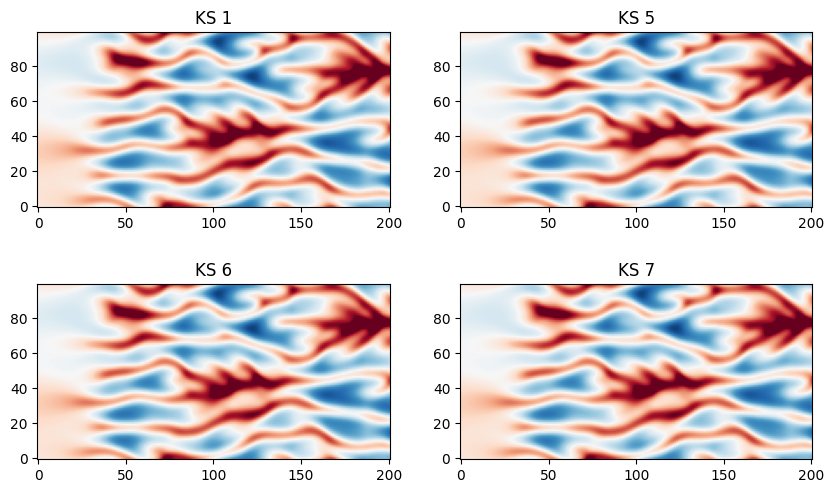

In [49]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 6))

ax_s[0, 0].imshow(trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[0, 0].set_title("KS 1")

ax_s[0, 1].imshow(trj_5[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[0, 1].set_title("KS 5")

ax_s[1, 0].imshow(trj_6[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[1, 0].set_title("KS 6")

ax_s[1, 1].imshow(trj_7[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6.5, vmax=6.5)
ax_s[1, 1].set_title("KS 7")

### General Gradient Norm Stepper

$$ \frac{\partial u}{\partial t} + b_2 \frac{1}{2} \left(\frac{\partial}{\partial x}  u \right)^2  = \sum_{j=0}^s  a_j \frac{\partial^j u}{\partial x^j}  $$

ToDo

### Normalized Gradient Norm Stepper

With the normalization

$$ \alpha_j = \frac{a_j \Delta t}{L^j} $$

and

$$ \beta_2 = \frac{b_2 \Delta t}{L^2} $$

### Fisher-KPP Equation

$$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} + r(u - u^2) $$

### General Polynomial Stepper

$$ \frac{\partial u}{\partial t} = \sum_{j=0}^s  a_j \frac{\partial^j u}{\partial x^j} + \sum_{j=0}^p d_j u^j $$

### Normalized Polynomial Stepper

Introduces these normalizations for the linear coefficients

$$ \alpha_j = \frac{a_j \Delta t}{L^j} $$

and for the polynomial coefficients

$$ \delta_j = d_j \Delta t $$

The polynomial coefficients are **not** divided by the domain extent (raised to
something). This also makes sense because there is no derivative involved in a
polynomial nonlinearity.

### General Nonlinear Stepper

Only Works in 1d

$$ \frac{\partial u}{\partial t} = \sum_{j=0}^s  a_j \frac{\partial^j u}{\partial x^j} + b_0 u^2 + b_1 \frac{1}{2} \frac{\partial u^2}{\partial x} + b_2 \frac{1}{2} \left(\frac{\partial}{\partial x}  u \right)^2  $$

### Normalized General Nonlinear Stepper

(Also only works in 1d)

$$ \alpha_j = \frac{a_j \Delta t}{L^j} $$

$$ \beta_j = \frac{b_j \Delta t}{L^j} $$